# STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [3]:
print('X_train :' , X_train.shape)
print('X_test : ' , X_test.shape)
print('y_train : ' , y_train.shape)
print('y_test : ' , y_test.shape)

X_train : (50000, 32, 32, 3)
X_test :  (10000, 32, 32, 3)
y_train :  (50000, 1)
y_test :  (10000, 1)


# STEP #2: VISUALIZE DATA

[4]


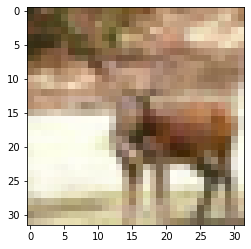

In [4]:
i = 1001
plt.imshow(X_train[i])
print(y_train[i])

[4]


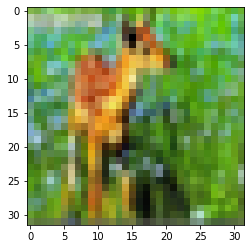

In [5]:
i = 1005
plt.imshow(X_train[i])
print(y_train[i])

In [6]:
y_train.shape[0]

50000

In [7]:
labels = np.unique(y_train)
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
#number of classes
K = len(set(y_train.flatten()))
print("number of classes:", K)

number of classes: 10


In [9]:
print('y_train', y_train.shape, y_train )
print('y_train', y_train.flatten().shape, y_train.flatten() )

y_train (50000, 1) [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
y_train (50000,) [6 9 9 ... 9 1 1]


C:\Users\Soudia\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


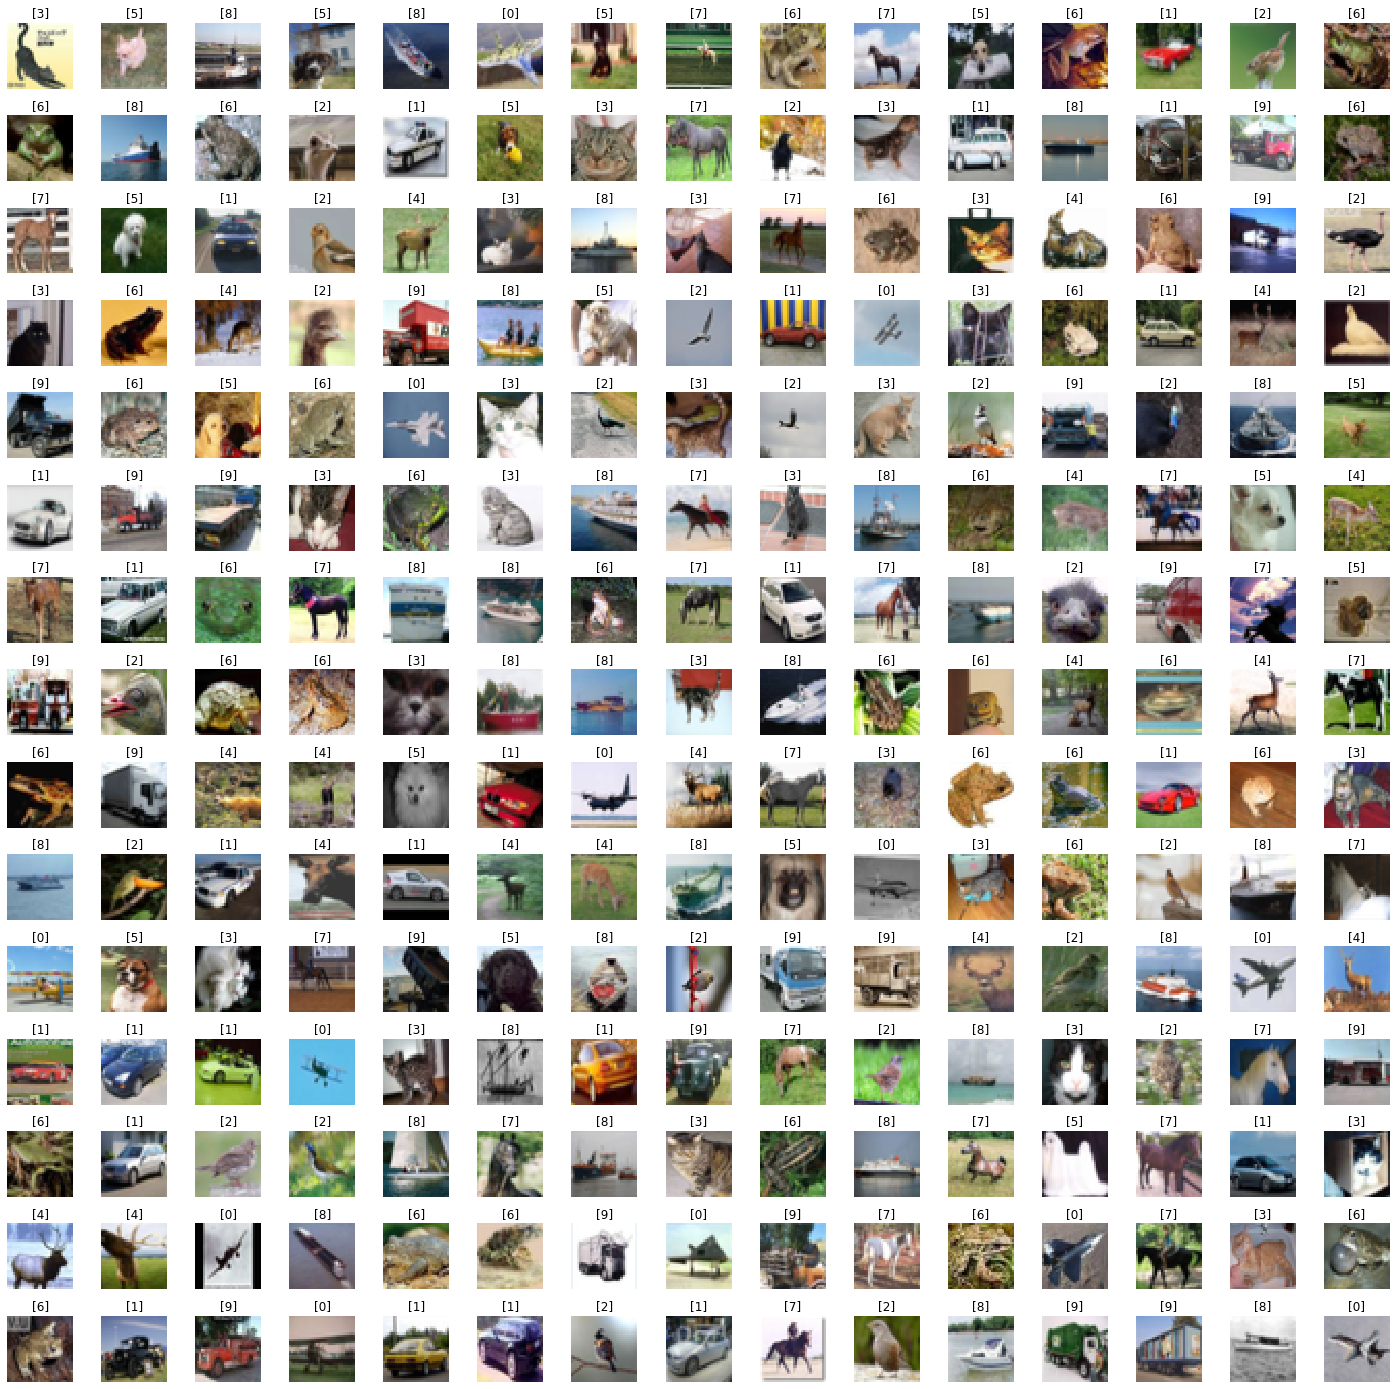

In [10]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(W_grid, L_grid, figsize = (25, 25))
axes = axes.ravel() # flatten  into 15x15 arrays, soit (225,1)

n_training = len(X_train)

for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, n_training) # Renvoie un chiffre aléatoire entre 0 et 5000
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) # à chaque image, le titre correspond la catégorie
    axes[i].axis('off') # enlève les chiffres en x, y 
    
    
plt.subplots_adjust(hspace = 0.4)

In [11]:
len(X_train)

50000

# STEP #3: DATA PREPARATION

In [12]:
type(X_train[0][0][0][0])

numpy.uint8

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
number_cat = 10

In [15]:
y_train # on doit le transformer en format binaire soit 9 zeros et 1 fois 1

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
import tensorflow.keras
y_train = tensorflow.keras.utils.to_categorical(y_train, number_cat)

In [17]:
print('y_train shape', y_train.shape)
y_train # sous format get_dummies

y_train shape (50000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_test = tensorflow.keras.utils.to_categorical(y_test, number_cat)
print('y_test shape : ', y_test.shape)

y_test shape :  (10000, 10)


In [19]:
print('X_train :' , X_train.shape)
print('X_test : ' , X_test.shape)
print('y_train : ' , y_train.shape)
print('y_test : ' , y_test.shape)

X_train : (50000, 32, 32, 3)
X_test :  (10000, 32, 32, 3)
y_train :  (50000, 10)
y_test :  (10000, 10)


## La normalisation se fait en /255, raison pour laquelle nous avons transformer les valeurs en float !

In [20]:
X_train = X_train /255
X_test = X_test /255

X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [21]:
Input_shape = X_train.shape[1:]
print('Input shape', Input_shape)

Input shape (32, 32, 3)


# STEP #4: TRAIN THE MODEL

In [22]:
# Sequential model, from left to right 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import TensorBoard

In [23]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(BatchNormalization())
    
cnn_model.add(MaxPooling2D(2,2))
#cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(2,2))
#cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(units = 512, activation = 'relu')) # 512 neurons

cnn_model.add(Dense(units = 512, activation = 'relu')) # another hidden layer

cnn_model.add(Dense(units = 10, activation = 'softmax')) # softmax : total sum outputs will be 1. units = 10 categories

In [24]:
# RMS : Root mean square 

cnn_model.compile(loss = 'categorical_crossentropy',
                 optimizer = tensorflow.keras.optimizers.RMSprop(lr = 0.001),
                 metrics = ['accuracy'])


In [26]:
# batch size = how many inputs image at the same time
# Shuffle permet d'éviter l'overfitting

history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 10,shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 236s 151ms/step - loss: 1.2976 - accuracy: 0.5508
Epoch 2/10
1563/1563 [==============================] - 241s 154ms/step - loss: 0.9562 - accuracy: 0.6771
Epoch 3/10
1563/1563 [==============================] - 228s 146ms/step - loss: 0.8467 - accuracy: 0.7143
Epoch 4/10
1563/1563 [==============================] - 227s 145ms/step - loss: 0.7626 - accuracy: 0.7454
Epoch 5/10
1563/1563 [==============================] - 228s 146ms/step - loss: 0.7076 - accuracy: 0.7669
Epoch 6/10
1563/1563 [==============================] - 254s 163ms/step - loss: 0.6703 - accuracy: 0.7778
Epoch 7/10
1563/1563 [==============================] - 232s 149ms/step - loss: 0.6402 - accuracy: 0.7885
Epoch 8/10
1563/1563 [==============================] - 237s 151ms/step - loss: 0.5952 - accuracy: 0.8028
Epoch 9/10
1563/1563 [==============================] - 247s 158ms/step - loss: 0.5587 - accuracy: 0.8172 - l - ETA: 6s - loss: 0.5580 - ac - ETA: 5s - 

Les résultats :
- Avec Batch Normalization , sans DropOut, Epoch = 1, accuracy : 0.5572
- Avec Batch Normalization , avec DropOut = 0.2, Epoch = 1 : 0.5517
- Avec Batch Normalization , avec DropOut = 0.2, Epoch = 10 : 0.8275

# STEP #5: EVALUATE THE MODEL

In [27]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Accuracy' , evaluation[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.8575 - accuracy: 0.7613
Accuracy 0.7613000273704529


In [28]:
predicted_class = cnn_model.predict_classes(X_test)
%time predicted_class # sous format integer

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Wall time: 920 µs


array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [29]:
print(' predicted classes', predicted_class.shape)

 predicted classes (10000,)


In [30]:
y_test # y_test initial sous format float

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [31]:
# transformer y_test sous formet initial, càd avec les numero de catégories au lieu de get_dummies
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

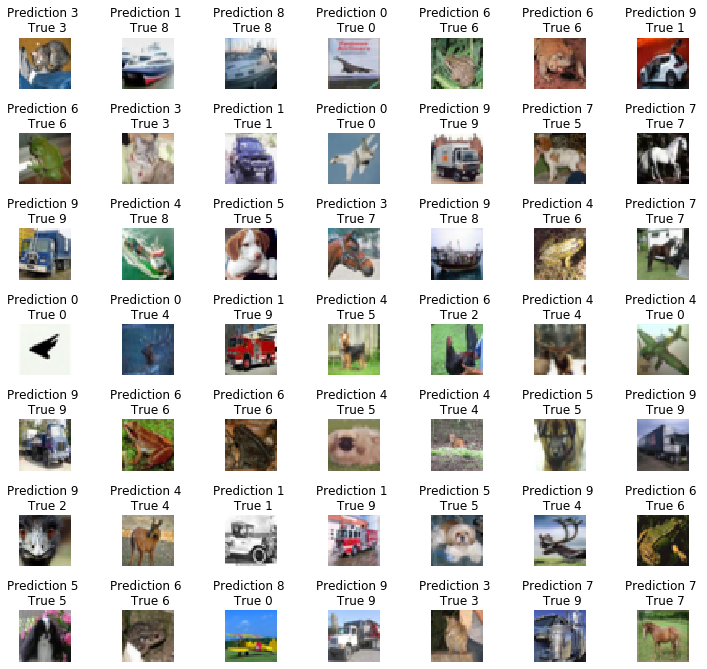

In [29]:
L = 7
W = 7

fig, axes = plt.subplots(L , W , figsize= (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W) : 
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction {} \n True {}'.format(predicted_class[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace  = 1 )

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_class)
cm

array([[732,   9,   6,  43,  44,   7,   8,  12,  69,  70],
       [  4, 857,   1,  11,  11,   3,  11,   1,  14,  87],
       [ 56,   2, 387, 113, 169, 103, 105,  41,  18,   6],
       [  9,   1,   3, 637,  74, 164,  58,  37,   6,  11],
       [  1,   0,   4,  78, 807,  31,  33,  40,   6,   0],
       [  7,   0,   3, 153,  52, 716,  18,  41,   3,   7],
       [  7,   1,   1,  69,  22,  24, 863,   8,   2,   3],
       [  5,   0,   2,  30,  56,  45,   6, 845,   0,  11],
       [ 35,  16,   4,  27,  10,   5,   8,   4, 862,  29],
       [  8,  29,   1,  13,   7,   4,   5,   9,  17, 907]], dtype=int64)

''

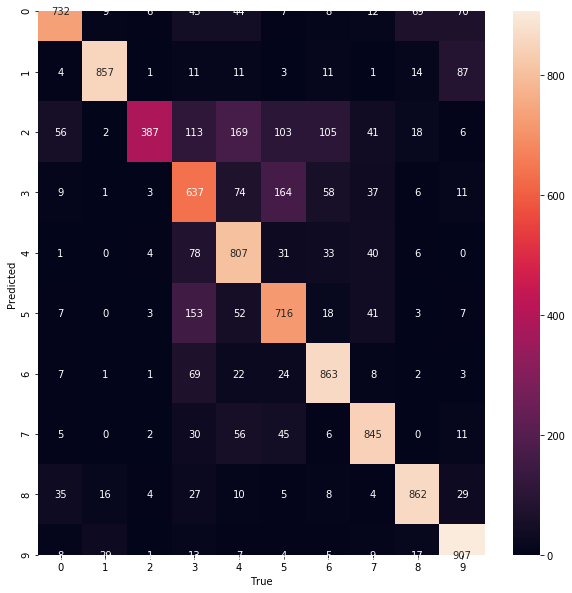

In [33]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True, fmt="d")
plt.xlabel('True')
plt.ylabel('Predicted')
;

# STEP #6: SAVING THE MODEL

In [32]:
import os
directory = os.path.join(os.getcwd(), 'saved_models') # crée un dossier 'Saved models' dans l'emplacement actuel

if not os.path.isdir(directory): # si le dossier n'existe pas déjà, il faut créer le dossier
    os.makedirs(directory)
    
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

In [33]:
os.getcwd()

'C:\\Users\\Soudia\\Documents\\Data science\\Exos Udemy\\CIFAR10'

# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

### Furthermore, batch normalization regularizes the model and reduces the need for Dropout 

# STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [8]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [9]:
# transformer X_train en float

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
print('X_train :' , X_train.shape)
print('X_test : ' , X_test.shape)

X_train : (50000, 32, 32, 3)
X_test :  (10000, 32, 32, 3)


In [11]:
n = 8
X_sample = X_train[:n]
print('X_sample shape', X_sample.shape)

X_sample shape (8, 32, 32, 3)


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range = 40)
dataget_train.fit(X_sample)

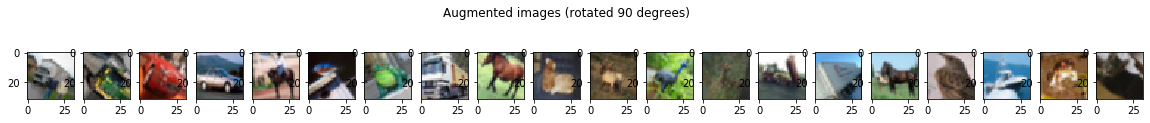

In [21]:
from PIL import Image

fig = plt.figure(figsize = (20,2))

for x_batch in dataget_train.flow(X_sample, batch_size = n):

     for i in range(0,n):

            ax = fig.add_subplot(1, n, i+1)

            ax.imshow(Image.fromarray(np.uint8(x_batch[i])))

     fig.suptitle('Augmented images (rotated 90 degrees)')

     plt.show()

     break

### La data augmentation n'est pas appliquée à toutes les images mais de manière aléatoire a qq images

X_batch size (20, 32, 32, 3)


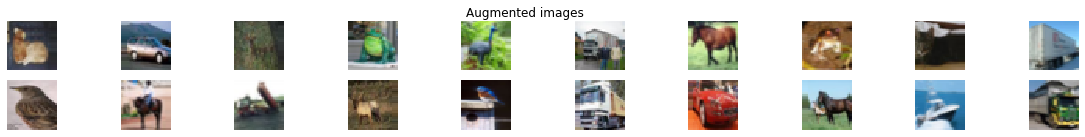

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

n = 20
X_sample = X_train[:n]

#dataget_train = ImageDataGenerator(brightness_range = (2,3), horizontal_flip = True)
#dataget_train = ImageDataGenerator(vertical_flip = True)
dataget_train = ImageDataGenerator(width_shift_range = 0.1)
# dataget_train = ImageDataGenerator(height_shift_range = 0.5)

dataget_train.fit(X_sample)

fig = plt.figure(figsize = (20,2))

for x_batch in dataget_train.flow(X_sample, batch_size = n):
     print('X_batch size', x_batch.shape)
     for i in range(0,n):
            ax = fig.add_subplot(2, n/2, i+1)
            ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
            ax.axis('off')
     fig.suptitle('Augmented images')
        
     plt.show()

     break

# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=90,
                            width_shift_range = 0.1,
                             horizontal_flip = True,
                             vertical_flip = True
                            )

In [16]:
datagen.fit(X_train)

In [17]:
# Les X_train auront les features de la data augmentation

cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32 ) , epochs = 10)

NameError: name 'cnn_model' is not defined

In [ ]:
y_test = tensorflow.keras.utils.to_categorical(y_test, number_cat)

In [ ]:
y_test

In [ ]:
print('X_train :' , X_train.shape)
print('X_test : ' , X_test.shape)
print('y_train : ' , y_train.shape)
print('y_test : ' , y_test.shape)

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Accuracy' , evaluation[1])



In [ ]:
model_path = os.path.join(directory, 'keras_cifar_augmented_images.h5')
cnn_model.save(model_path)

#model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
#cnn_model.save(model_path)